<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 29** | Agrupamento e segmentação de dados
Caderno de **exercício**<br>

# Tarefa 1

Discente: Samuel Saturno

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm.notebook         import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score

Importando o dataframe

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Utilizando o método value_counts() do pandas em um DataFrame df
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [4]:
# Utilizando o método info() em um DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Retorna uma série com a contagem de valores únicos em cada coluna do DataFrame df.
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [6]:
# Resumo estatístico das variáveis numéricas
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

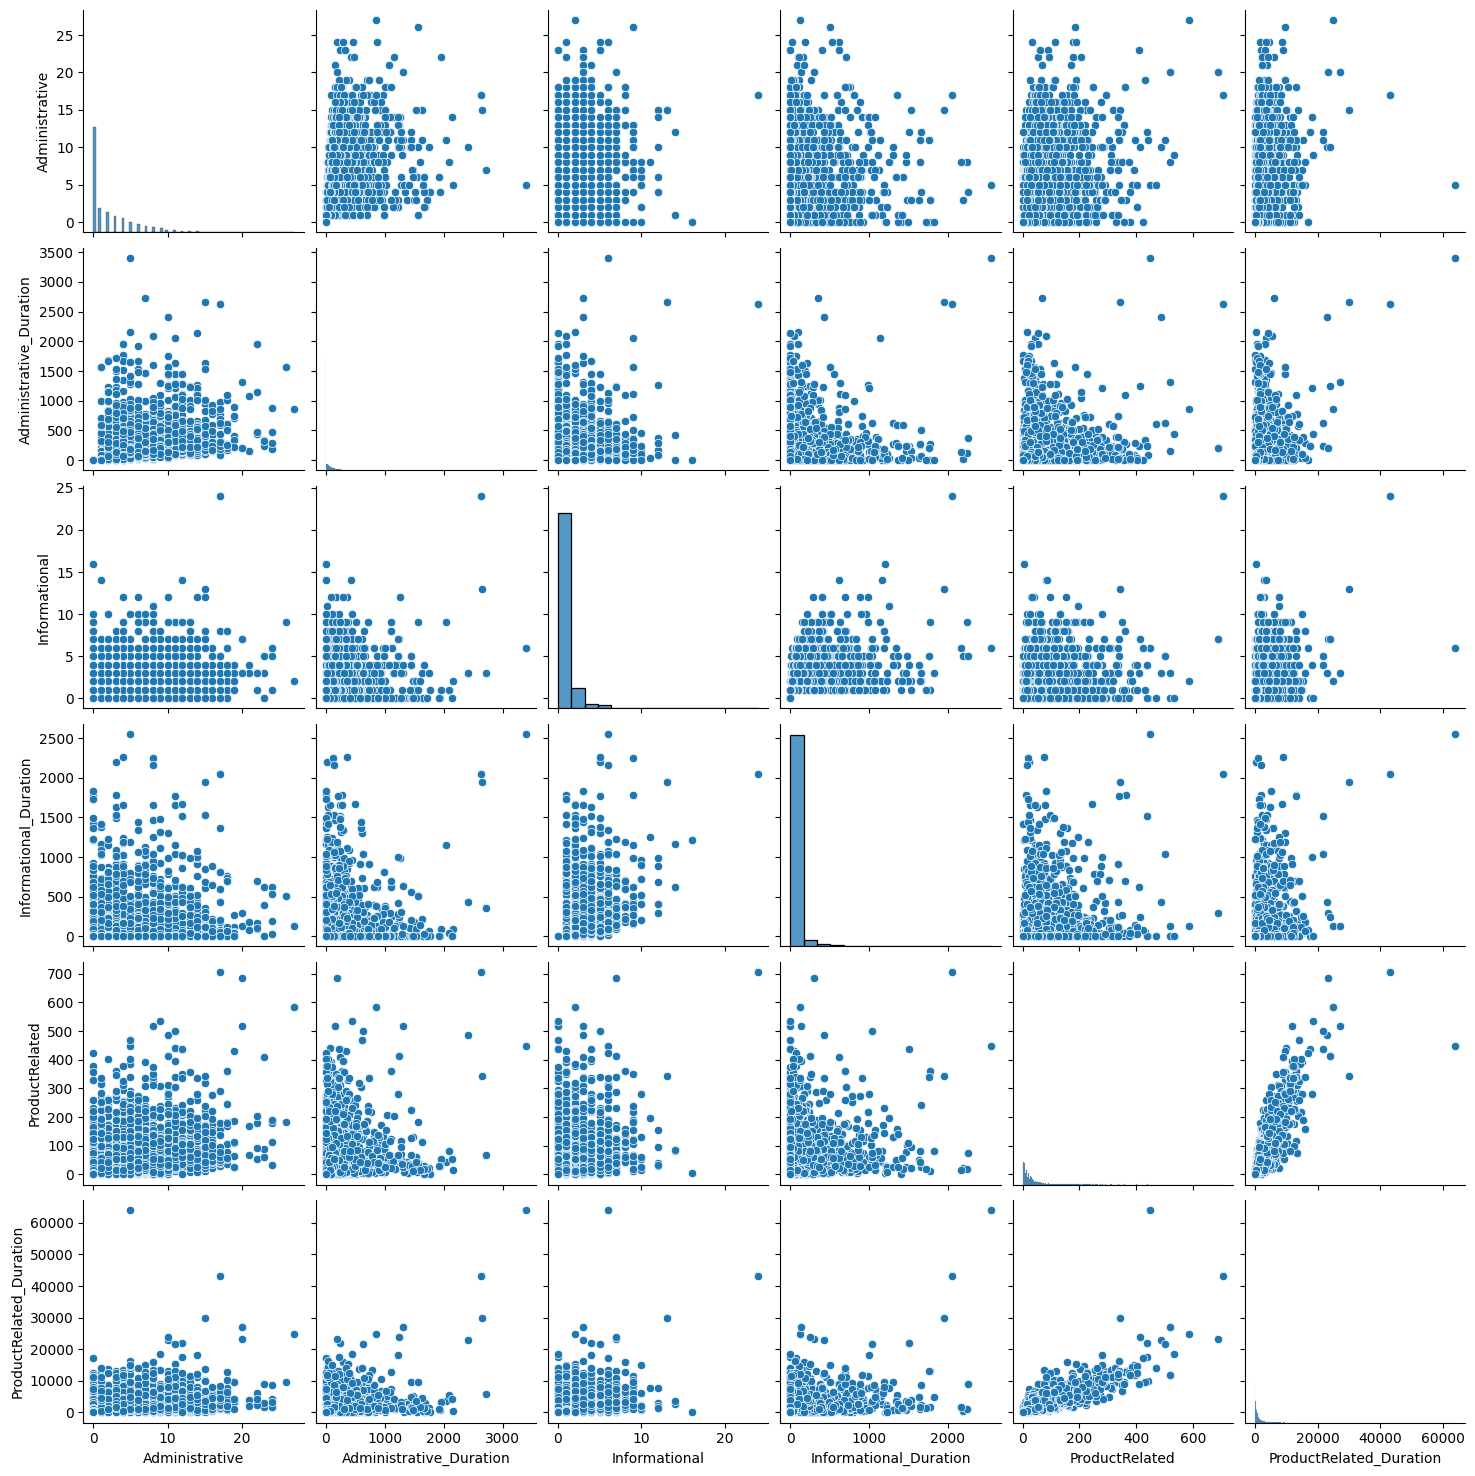

In [7]:
# Definindo as colunas que serão usadas no pair plot
colunas = df.columns[:6]  # Aqui, estamos considerando as seis primeiras colunas do DataFrame

# Criando o pair plot para visualizar a relação entre as variáveis selecionadas
sns.pairplot(data=df[colunas])
plt.show()  # Mostra o gráfico


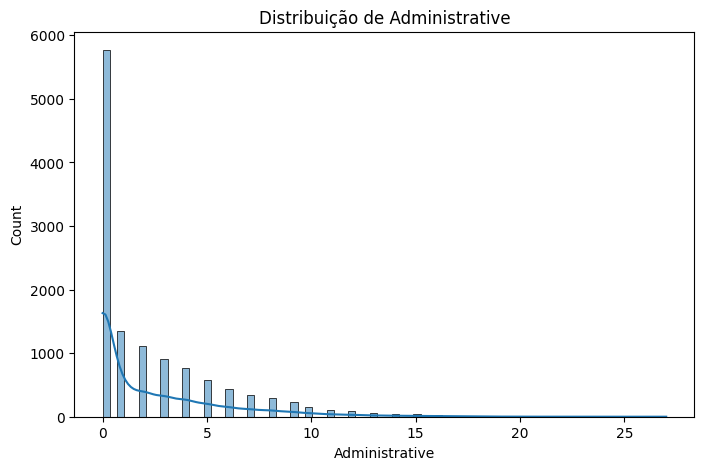

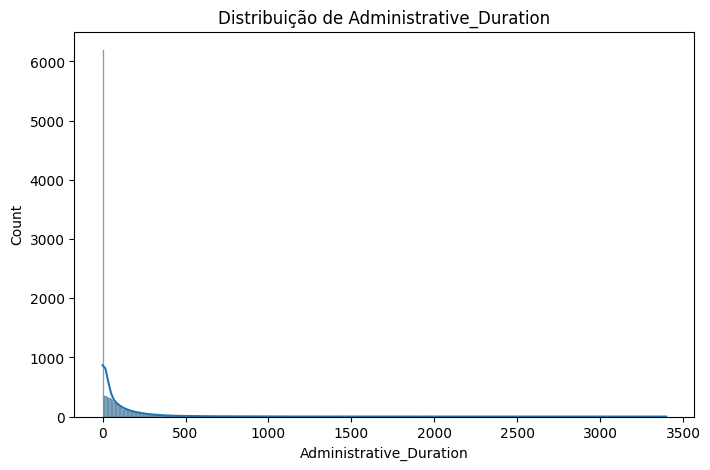

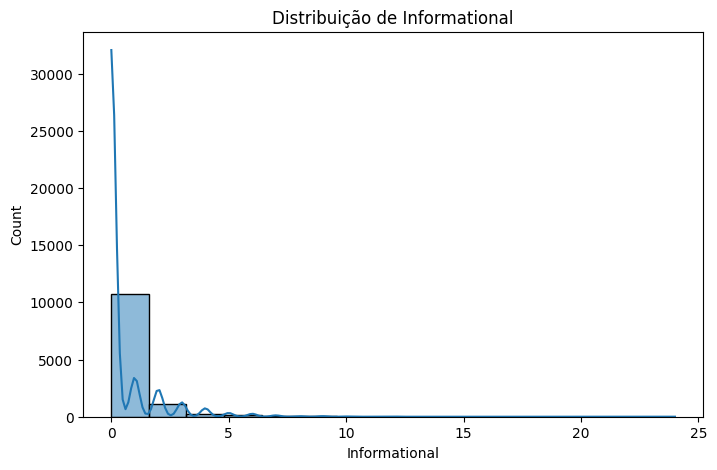

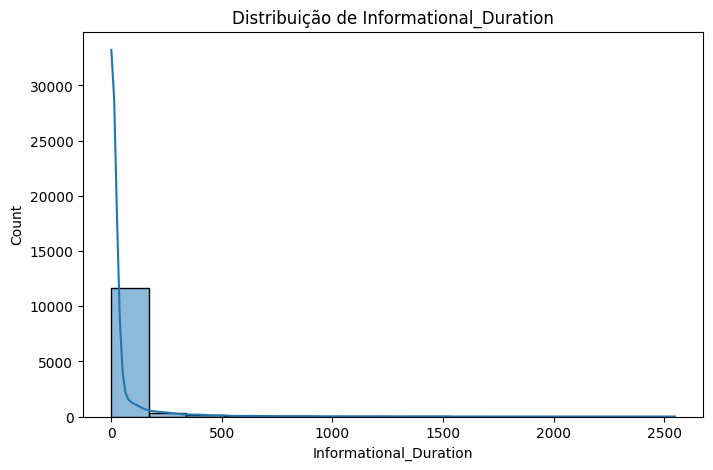

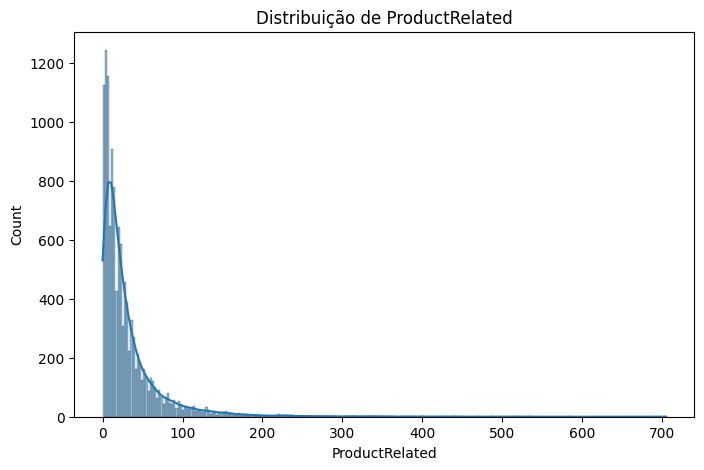

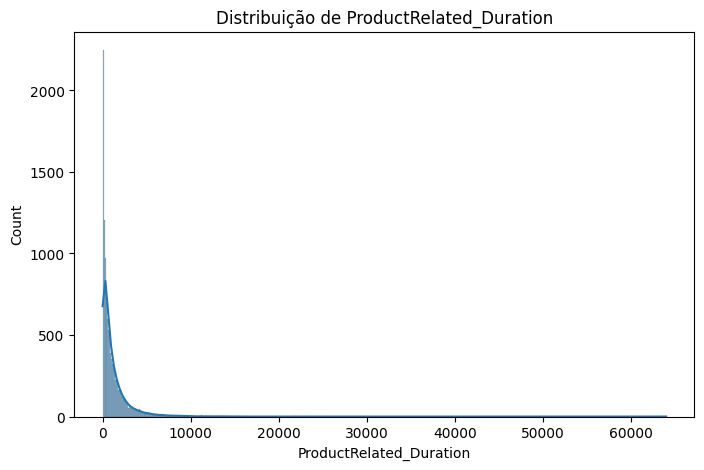

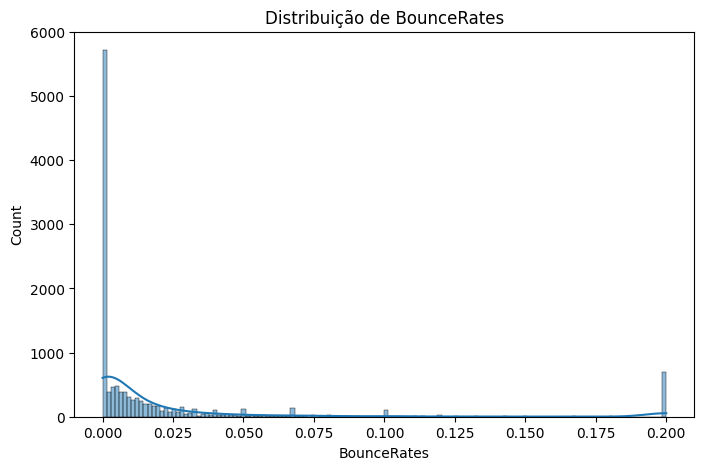

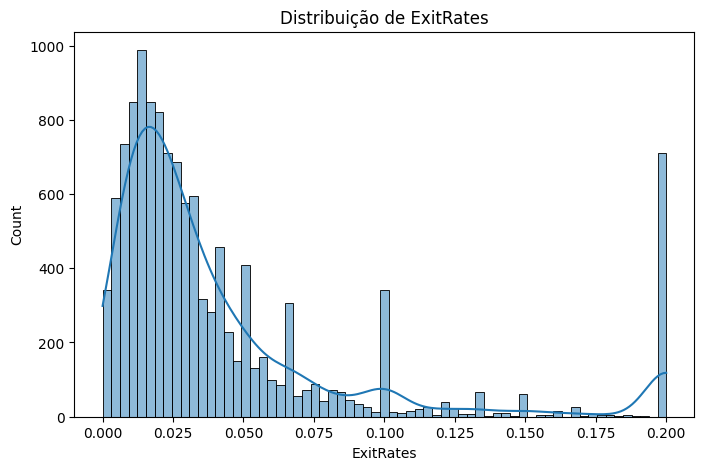

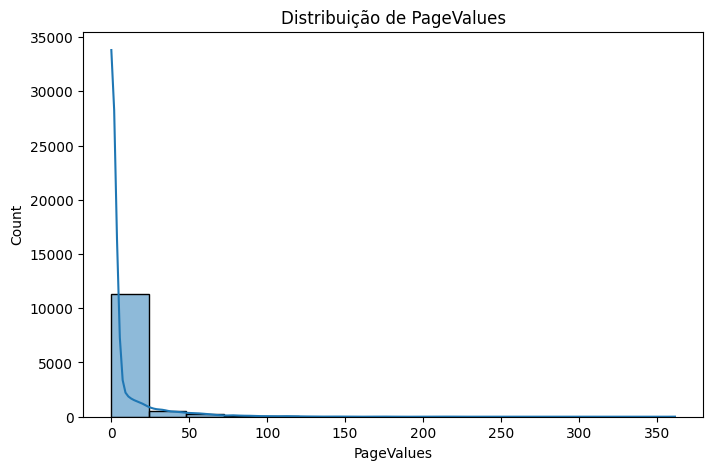

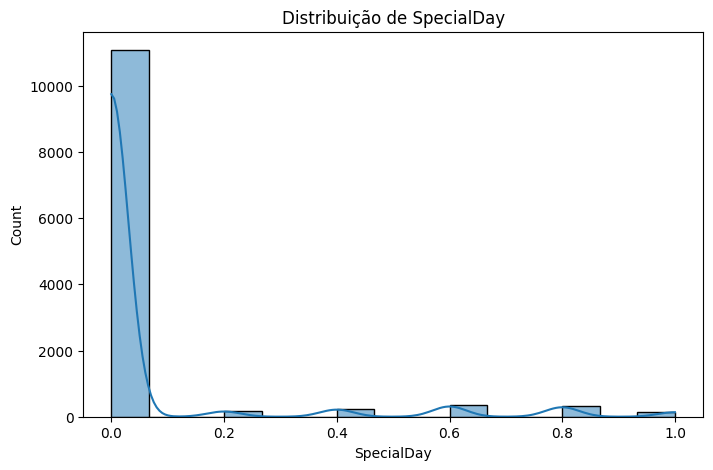

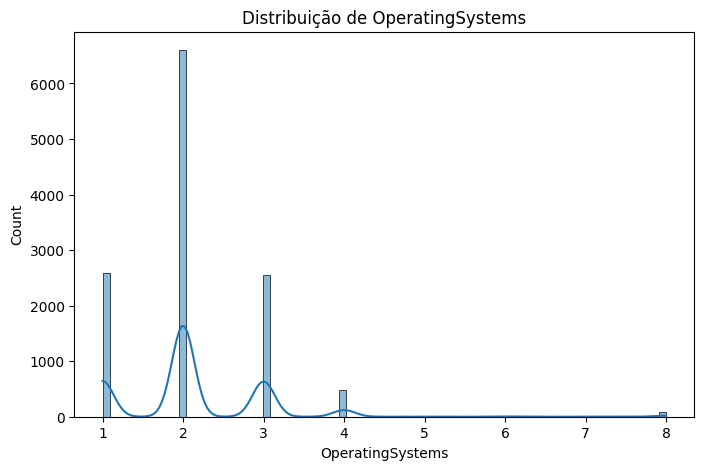

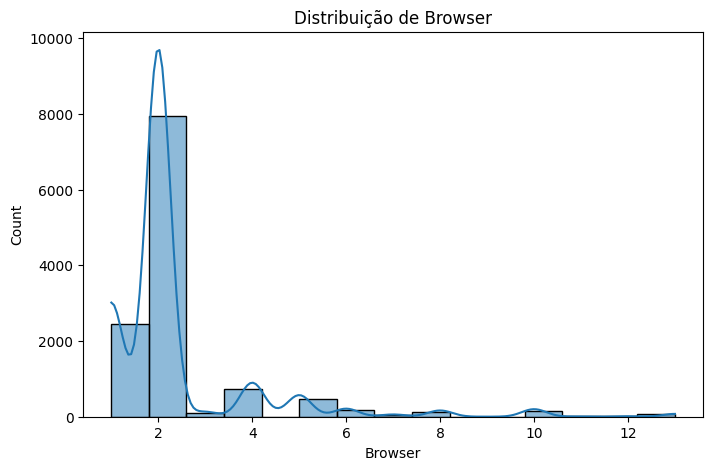

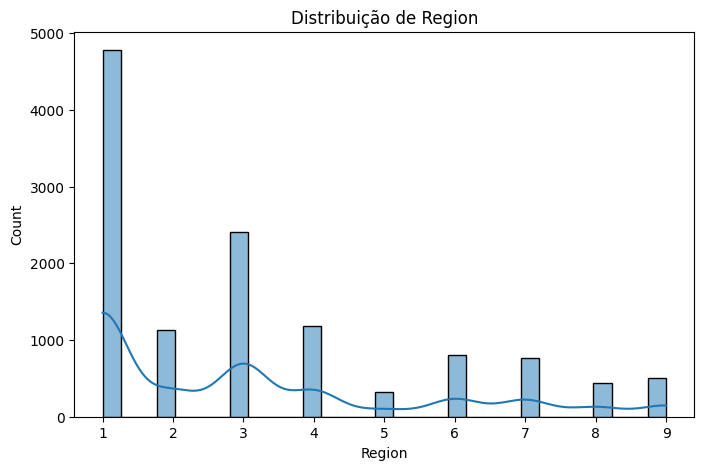

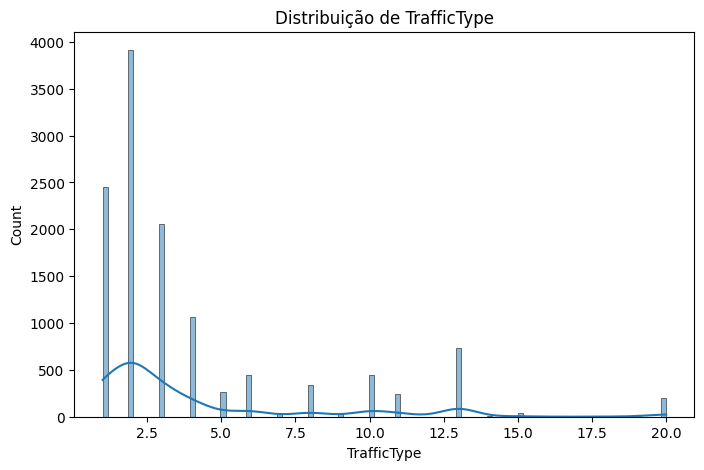

In [13]:
# Verificar a distribuição das variáveis numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribuição de {column}')
    plt.show()

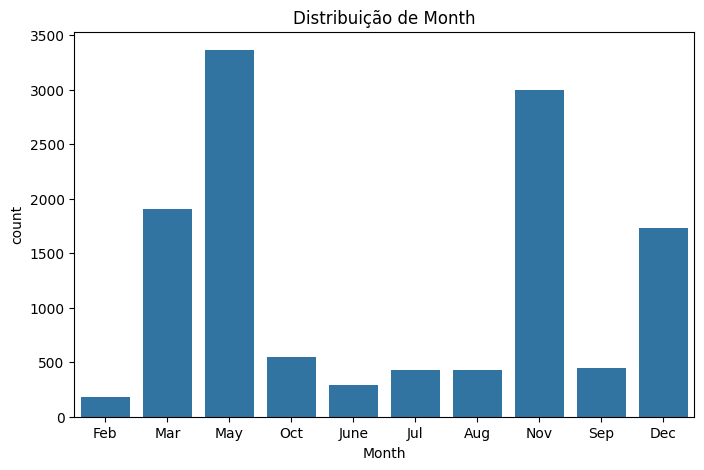

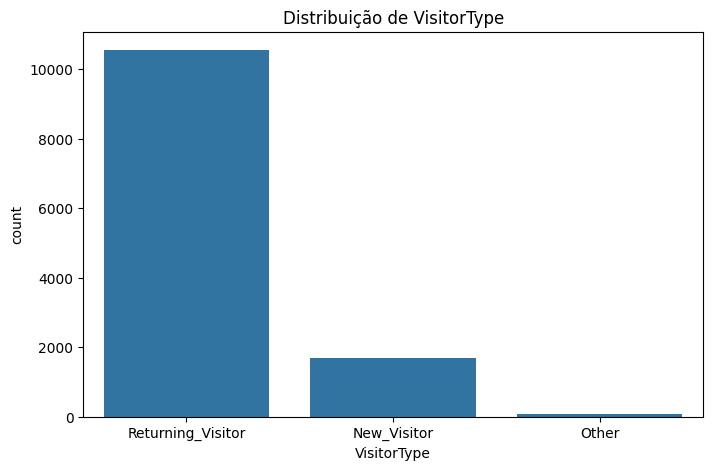

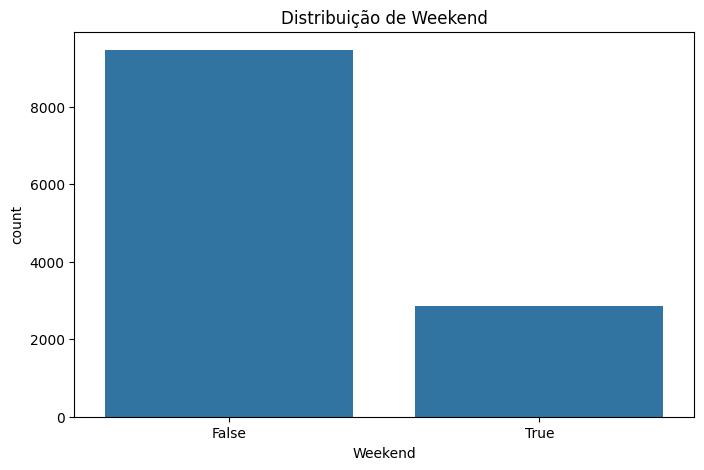

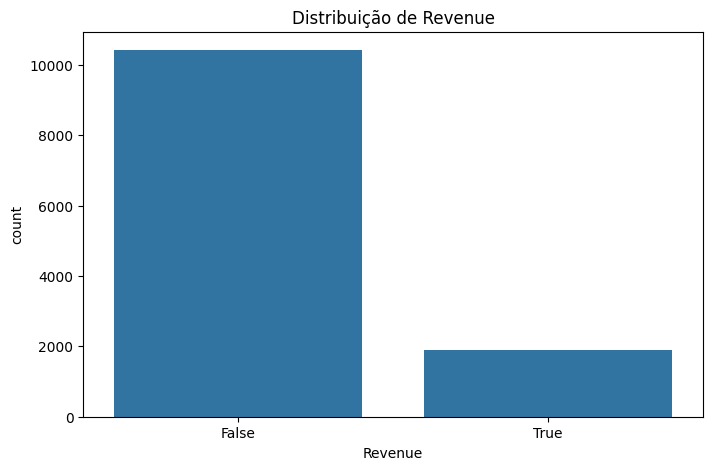

In [12]:
# Verificar a distribuição das variáveis categóricas
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribuição de {column}')
    plt.show()

In [11]:
# Verificar valores ausentes
print(df.isnull().sum()) # Não há valores ausentes, então não precisamos fazer tratamento para esse caso.

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [18]:
# Criando uma cópia do DataFrame df para padronizar os dados.
df_pad = df.copy()

# Seleciona somente as colunas numéricas do DataFrame df_pad.
colunas_numericas = df_pad.select_dtypes(include = 'number').columns

# A classe StandardScaler centraliza os dados para ter média zero e escalona-os para ter desvio padrão igual a um.
df_pad[colunas_numericas] = pd.DataFrame(data=StandardScaler().fit_transform(df_pad[colunas_numericas]),
                                         columns=df_pad[colunas_numericas].columns)

#Visualizando O DataFrame df_pad.
df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,-1.233426,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,-0.136078,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,2.058618,-0.790293,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,0.961270,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,0.961270,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False


In [21]:
# Resumo estatístico do Dataframe com os dados padronizados
print(df_pad.describe())

       Administrative  Administrative_Duration  Informational  \
count    1.233000e+04             1.233000e+04   1.233000e+04   
mean    -2.996612e-17             6.281359e-17  -4.610172e-18   
std      1.000041e+00             1.000041e+00   1.000041e+00   
min     -6.969930e-01            -4.571914e-01  -3.964779e-01   
25%     -6.969930e-01            -4.571914e-01  -3.964779e-01   
50%     -3.959377e-01            -4.147639e-01  -3.964779e-01   
75%      5.072280e-01             7.035981e-02  -3.964779e-01   
max      7.431499e+00             1.876956e+01   1.849960e+01   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            1.233000e+04    1.233000e+04             1.233000e+04   
mean            -2.535595e-17    4.610172e-17            -8.298309e-17   
std              1.000041e+00    1.000041e+00             1.000041e+00   
min             -2.449305e-01   -7.134884e-01            -6.243475e-01   
25%             -2.449305e-01   -5.560920e-0

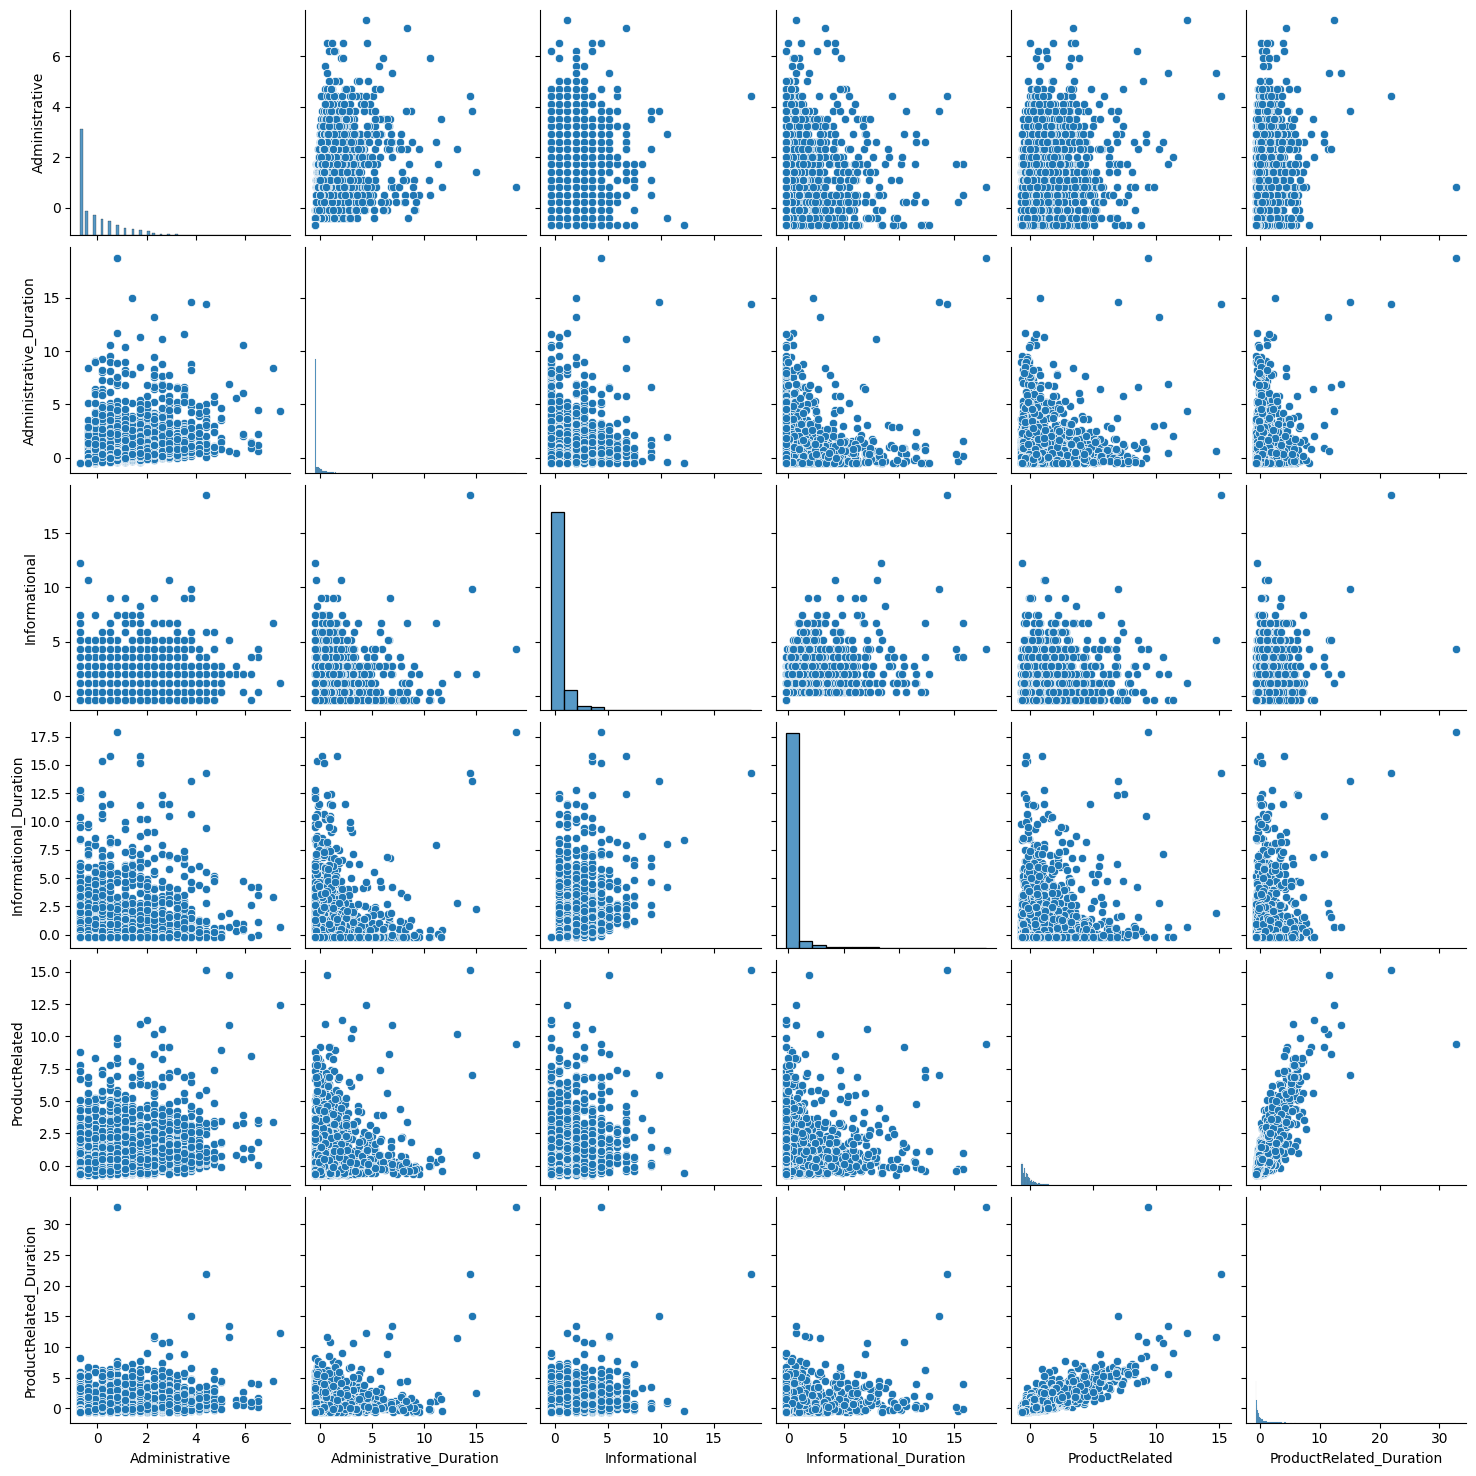

In [22]:
# Visualização dos gráficos pairplot df_pad com a padronização.
sns.pairplot(data = df_pad[colunas])
plt.show()

Método do cotovelo ("elbow method")

  0%|          | 0/14 [00:00<?, ?it/s]

    n_clusters           SQD
0            1  73980.000000
1            2  51211.776641
2            3  43201.879234
3            4  37339.945525
4            5  33474.055882
5            6  30541.145703
6            7  26740.065522
7            8  25186.257252
8            9  22508.612674
9           10  21130.812782
10          11  21235.742684
11          12  19151.802426
12          13  18000.842011
13          14  17461.872994


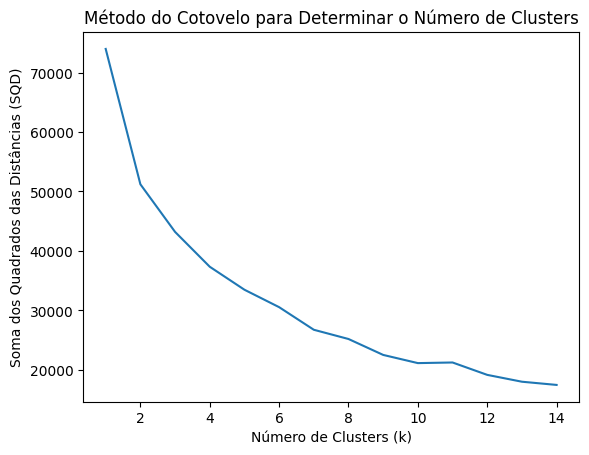

In [19]:
# Criando uma lista vazia para armazenar as somas dos quadrados das distâncias (SQD).
SQD = []

# Número de clusters desejados.
K = range(1,15)

# Cálculo do K-Means para os valor de k e armazena na lista SQD.
for k in tqdm(K):
    km = KMeans(n_clusters = k,
                n_init = 'auto')
    km = km.fit(df_pad[colunas])
    SQD.append(km.inertia_)

# Criando o DataFrame df_sqd.
df_sqd = pd.DataFrame(data = {'n_clusters': list(range(1, len(SQD) + 1)),'SQD': SQD})

# Visualizado o DataFrame df_sqd.
print(df_sqd)

# Visualização do gráfico do método do cotovelo.
plt.plot(df_sqd['n_clusters'], df_sqd['SQD'])
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias (SQD)')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()

Coeficiente de Silueta

  0%|          | 0/9 [00:00<?, ?it/s]

   n_clusters  silhueta_media
0           2        0.622424
1           3        0.504676
2           4        0.475577
3           5        0.515364
4           6        0.460834
5           7        0.471895
6           8        0.470141
7           9        0.424522
8          10        0.420476


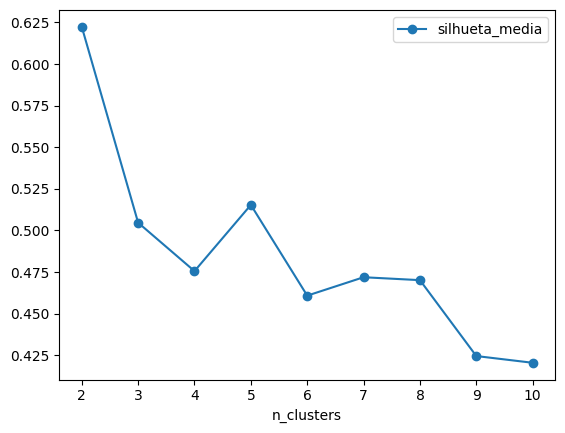

In [26]:
# Criando uma lista vazia para o Coeficiente da Silhueta.
silhuetas = []

# Número máximo de clusters.
max_clusters = 10

# Calcula o K-Means para cada valor de n_clusters e armazena o Coeficiente da Silhueta na lista 'silhuetas'.
for n_clusters in tqdm(range(2, max_clusters + 1)):

    # Executa o K-Means com o número de clusters atual.
    km = KMeans(n_clusters = n_clusters,
                n_init = 'auto').fit(df_pad[colunas])

    # Calcula o Coeficiente da Silhueta e adiciona à lista 'silhuetas'.
    silhuetas.append(silhouette_score(X = df_pad[colunas],
                                      labels = km.labels_))

    # Criação de nomes para os grupos identificados pelo K-Means.
    nomes_grupos = ['grupo_' + str(n) for n in range(n_clusters)]

    # Adiciona uma nova coluna ao DataFrame df_pad_ com os rótulos dos grupos.
    df_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(codes = km.labels_,
                                                                  categories = nomes_grupos)

# Criando um DataFrame para o Coeficiente da Silhueta.
df_silhueta = pd.DataFrame(data = {'n_clusters': list(range(2, max_clusters + 1)),
                                   'silhueta_media': silhuetas})

# Visualizando o DataFrame com os valores do Coeficiente de Silhueta.
print(df_silhueta)

# Visualização do gráfico Coeficiente da Silhueta médio em relação ao número de clusters.
df_silhueta.plot.line(x = 'n_clusters',
                      y = 'silhueta_media',
                      marker = 'o')

plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

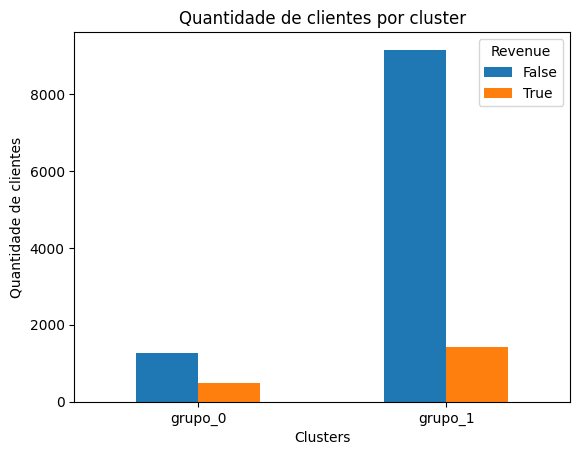

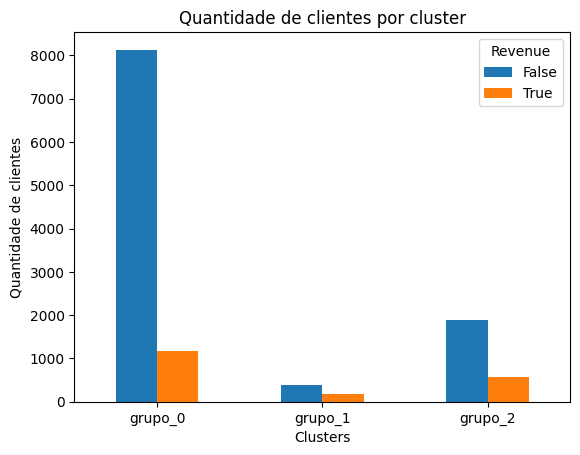

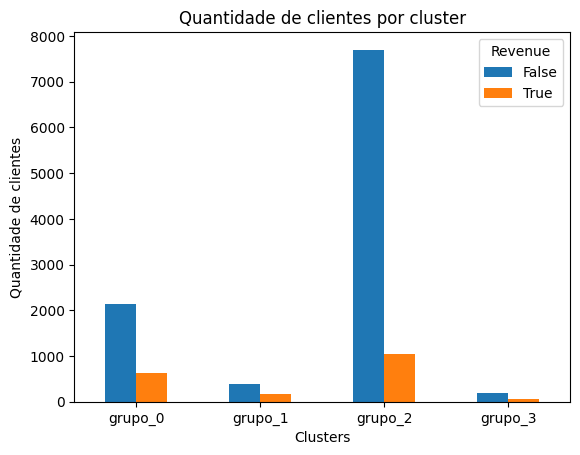

In [33]:
# Função para criar os gráficos barplot de cada cluster
def cluster_barplot(data: pd.DataFrame, coluna_cluster: str) -> None:
    """
    Cria um gráfico de barras para mostrar a quantidade de clientes por cluster.

    Parâmetros:
        data (pd.DataFrame): O DataFrame contendo os dados.
        coluna_cluster (str): O nome da coluna que contém as informações dos clusters.

    Retorna:
        None
    """
    # Agrupa os dados pelo cluster e por 'Revenue', contando a quantidade de clientes em cada combinação.
    df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()

    # Cria um gráfico de barras a partir do DataFrame agrupado.
    ax = df_agrupado.plot.bar(rot=0)

    # Define rótulos para os eixos X e Y, além do título do gráfico.
    ax.set_ylabel('Quantidade de clientes')
    ax.set_xlabel('Clusters')
    plt.title('Quantidade de clientes por cluster')

    # Exibe o gráfico.
    plt.show()

# Exemplo de uso:

# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (2 clusters).
cluster_barplot(data = df_pad, coluna_cluster = 'grupos_2')

# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (3 clusters).
cluster_barplot(df_pad, 'grupos_3')

# Cria um gráfico de barras para mostrar a quantidade de clientes por cluster (4 clusters).
cluster_barplot(df_pad, 'grupos_4')

In [34]:
# Criando uma cópia do DataFrame e aplicando uma padronização df_pad.
df_pad_ = df_pad.copy()

# Renomeia as duas categorias na coluna 'grupos_2' para rótulos mais descritivos.
df_pad_['grupos_2'] = df_pad_['grupos_2'].cat.rename_categories({'grupo_0': 'Não interessados',
                                                                 'grupo_1': 'Compradores'})

# Renomeia as três categorias na coluna 'grupos_3' para rótulos mais descritivos.
df_pad_['grupos_3'] = df_pad_['grupos_3'].cat.rename_categories({'grupo_0': 'Não interessados',
                                                                 'grupo_1': 'Potenciais compradores',
                                                                 'grupo_2': 'Compradores'})

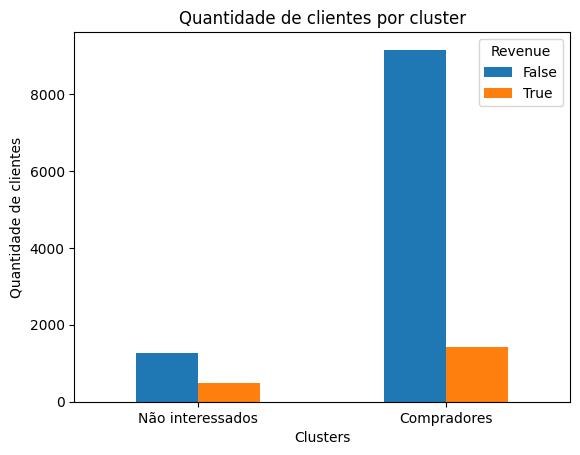

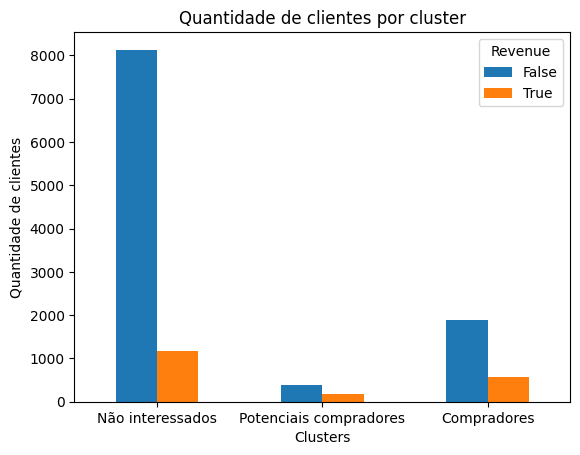

In [31]:
# Criando um gráfico de barras para mostrar a quantidade de clientes por cluster (2 clusters) usando as categorias renomeadas.
cluster_barplot(df_pad_, 'grupos_2')

# Criando um gráfico de barras para mostrar a quantidade de clientes por cluster (3 clusters) usando as categorias renomeadas.
cluster_barplot(df_pad_, 'grupos_3')

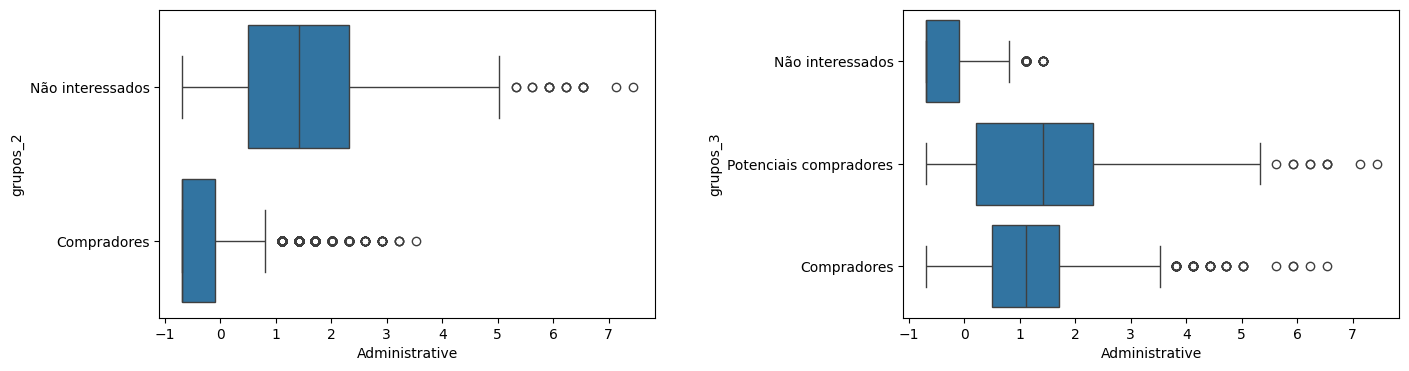

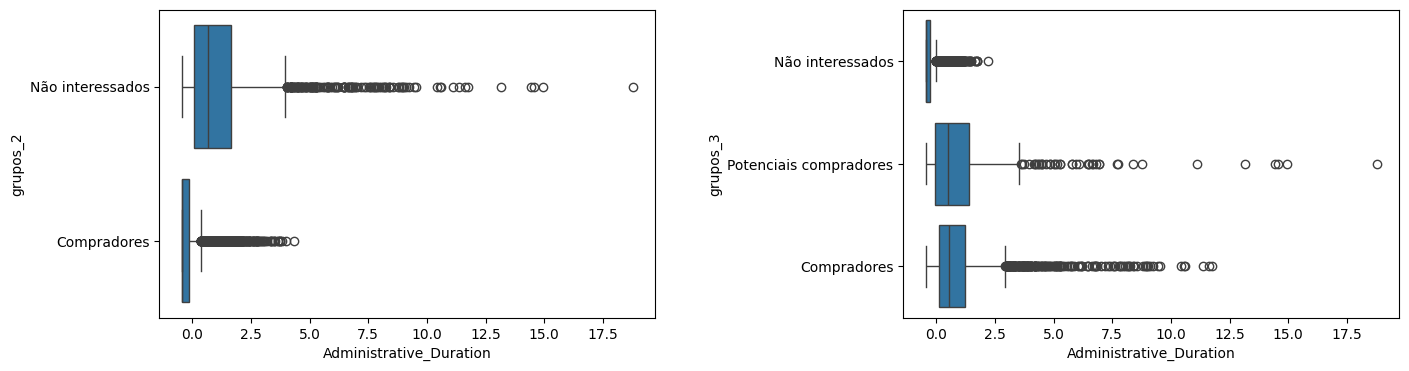

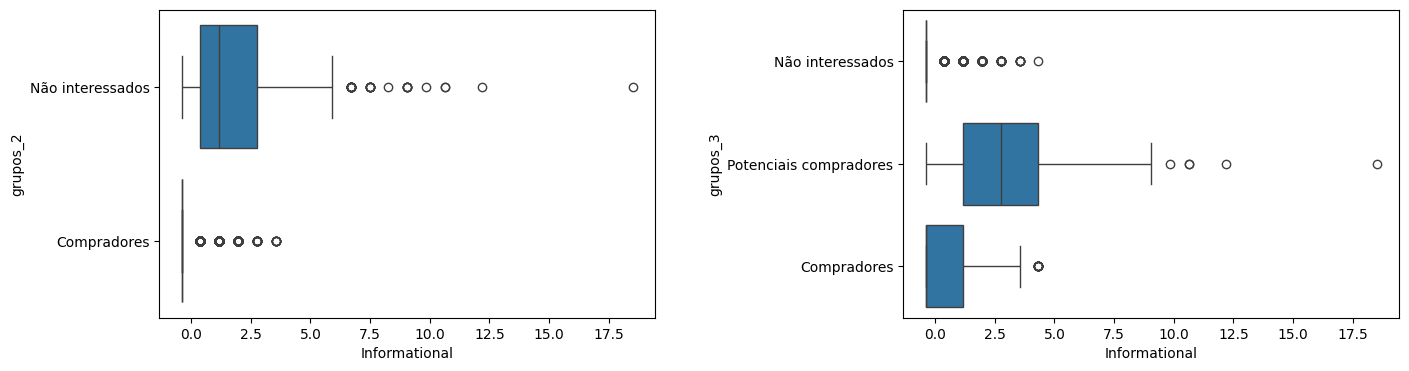

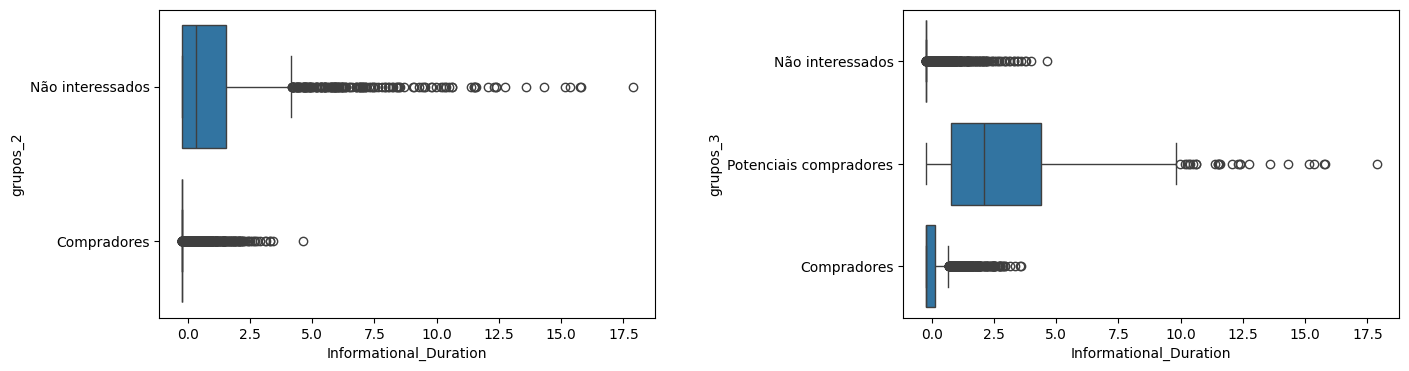

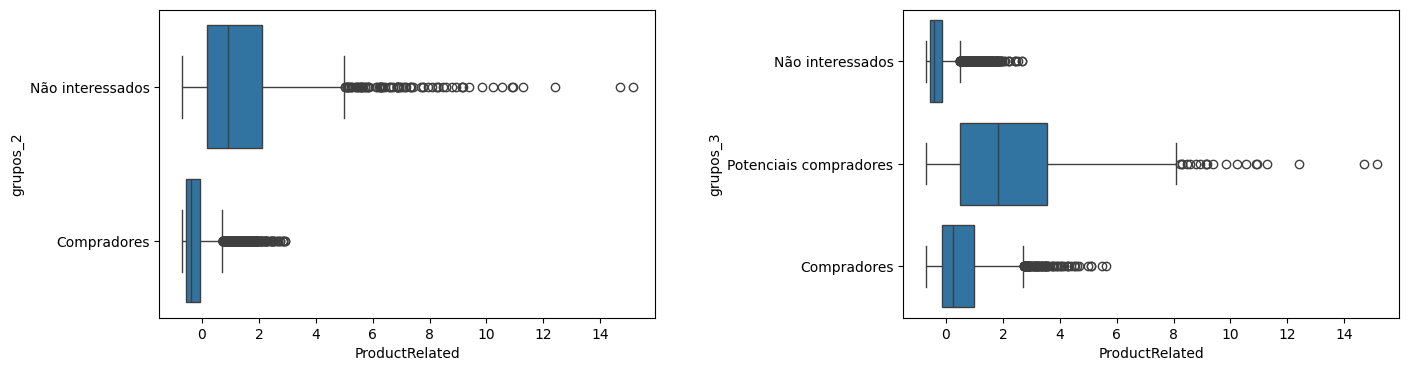

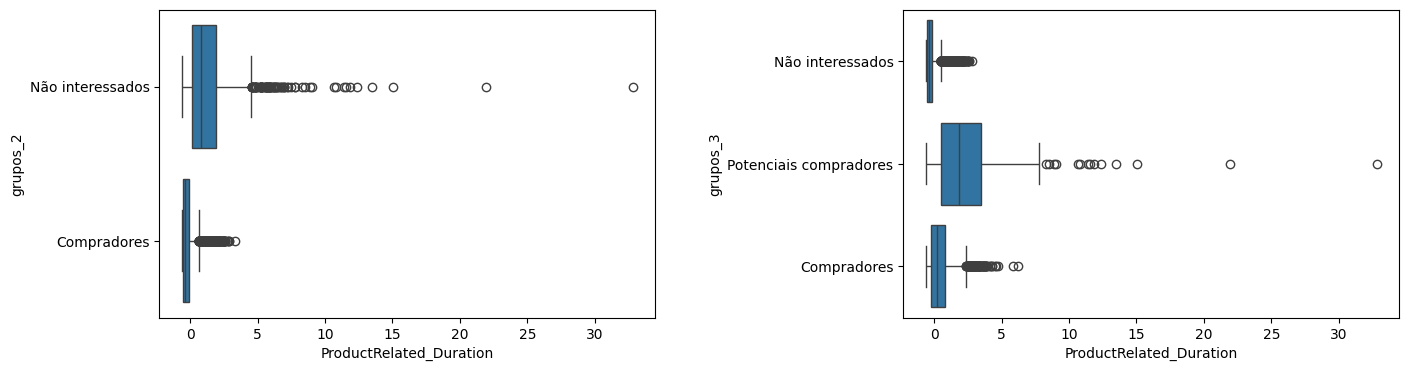

In [32]:
# Criando boxplots para cada uma das seis primeiras variáveis numéricas.
for n in range(6):
    # Cria uma figura com dois subplots, um para cada conjunto de clusters.
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    # Cria um boxplot para o conjunto de clusters 'grupos_2'.
    sns.boxplot(data=df_pad_, x=colunas[n], y='grupos_2', ax=ax[0])

    # Cria um boxplot para o conjunto de clusters 'grupos_3'.
    sns.boxplot(data=df_pad_, x=colunas[n], y='grupos_3', ax=ax[1])

    # Ajusta o espaço entre os subplots.
    plt.subplots_adjust(wspace=0.5)

    # Exibe os gráficos.
    plt.show()

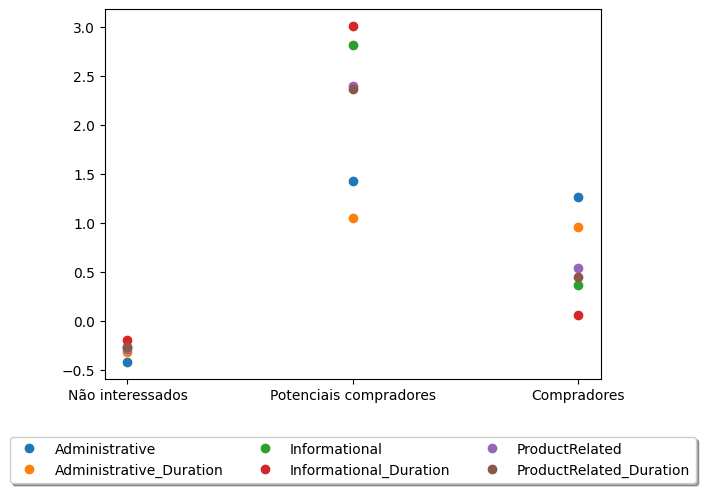

In [36]:
# Criando uma gráfico de dispersão.
fig, ax = plt.subplots()

# Gráfico de dispersão para as médias das variáveis numéricas em diferentes clusters.
ax.plot(df_pad_.groupby(['grupos_3'])[colunas].mean(), 'o')
ax.legend(colunas, loc='lower center', bbox_to_anchor=(0.5, -.3), ncol=3, fancybox=True, shadow=True)

# Visualizando o gráfico.
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

In [37]:
# Tabela de contingência cruzando as variáveis 'Revenue' e 'grupos_2' no DataFrame.
pd.crosstab(df_pad_['Revenue'], df_pad_['grupos_2'], normalize='all', margins=True).round(decimals = 2)

grupos_2,Não interessados,Compradores,All
Revenue,,,
False,0.10,0.74,0.85
True,0.04,0.12,0.15
All,0.14,0.86,1.00


### Insight

* Taxa de conversão:

A taxa de conversão dos "Não interessados" é de 0.12 (12%), o que indica que apenas 12% dos clientes classificados como "Não interessados" realizam uma compra.
Enquanto isso, a taxa de conversão dos "Compradores" é de 0.04 (4%), indicando que apenas 4% dos clientes classificados como "Compradores" realizam uma compra.
Isso destaca uma diferença significativa na taxa de conversão entre os dois grupos, sugerindo que o grupo de "Não interessados" tem uma taxa de conversão relativamente mais alta.

* Potencial de aumento de conversão:

Com base na tabela, vemos que a maioria dos clientes (86%) é classificada como "Não interessados". No entanto, mesmo com uma taxa de conversão de 12%, este grupo contribui substancialmente para as compras totais (0.85).
Isso sugere que há um potencial significativo para aumentar a conversão dos "Não interessados" em compradores, o que pode resultar em um aumento significativo na receita total.

* Segmentação e estratégias de marketing:

Os resultados indicam que os clientes classificados como "Compradores" representam apenas 4% do total, mas contribuem com 15% da receita total.
Isso sugere a importância de segmentar e direcionar estratégias de marketing específicas para os "Compradores", como programas de fidelidade, ofertas personalizadas ou comunicações direcionadas para aumentar sua participação na receita.

* Avaliação de desempenho:

A tabela fornece uma visão clara da distribuição dos clientes e suas contribuições para a receita total, permitindo uma avaliação eficaz do desempenho das estratégias de marketing e vendas em diferentes segmentos de clientes.
Isso pode ajudar na alocação eficiente de recursos e no desenvolvimento de estratégias mais direcionadas para maximizar as conversões e a receita.


In [40]:
# Agrupando os dados pelo corte nos valores da coluna 'BounceRates', 'Revenue' e 'grupos_3'.
(df_pad_.groupby([pd.qcut(x = df_pad_['BounceRates'],
                          q = 10,
                          duplicates = 'drop'),
                  'Revenue',
                  'grupos_3'])
        .count()
        .mean(axis = 1)
        .to_frame()
        .unstack()
        .rename(columns={0: 'Quantidade'})
        .astype(int))

Quantidade                                   
grupos_3                 Não interessados Potenciais compradores Compradores
BounceRates      Revenue                                                    
(-0.459, -0.393] False               3925                    145         891
                 True                 817                     70         317
(-0.393, -0.31]  False                516                    109         350
                 True                  96                     55         124
(-0.31, -0.192]  False                630                     70         309
                 True                  94                     34          79
(-0.192, 0.0183] False                815                     50         234
                 True                  86                     13          42
(0.0183, 0.743]  False               1038                     18         103
                 True                  56                      2           9
(0.743, 3.667]   False               1207                      1          11
                 True                  14                      0           0


### Insight:

* Compradores Potenciais vs. Não Interessados:

Observamos que em geral, à medida que o BounceRates aumenta (indicado pela categoria "True"), a quantidade de Potenciais Compradores e Compradores diminui, enquanto a quantidade de Não Interessados aumenta. Isso sugere uma correlação entre taxas de rejeição mais altas e menor propensão à compra.

* Impacto nas Vendas:

As categorias de BounceRates mais baixas geralmente têm mais Potenciais Compradores e Compradores, o que indica que taxas de rejeição mais baixas estão associadas a melhores resultados de vendas e receita.

* Potenciais Compradores em grupos específicos:

Em algumas faixas de BounceRates, como (-0.192, 0.0183] e (0.0183, 0.743], mesmo com taxas de rejeição relativamente baixas, a quantidade de Potenciais Compradores não é tão alta quanto esperado. Isso pode indicar a necessidade de investigar outros fatores que podem estar influenciando o interesse do cliente.

* Alta Taxa de Rejeição Extrema:

Na categoria mais alta de BounceRates (0.743, 3.667], não há Compradores registrados, apenas um pequeno número de Potenciais Compradores, e a maioria dos clientes é classificada como Não Interessados. Isso sugere um problema sério, onde uma alta taxa de rejeição está impactando drasticamente as vendas e o interesse dos clientes.


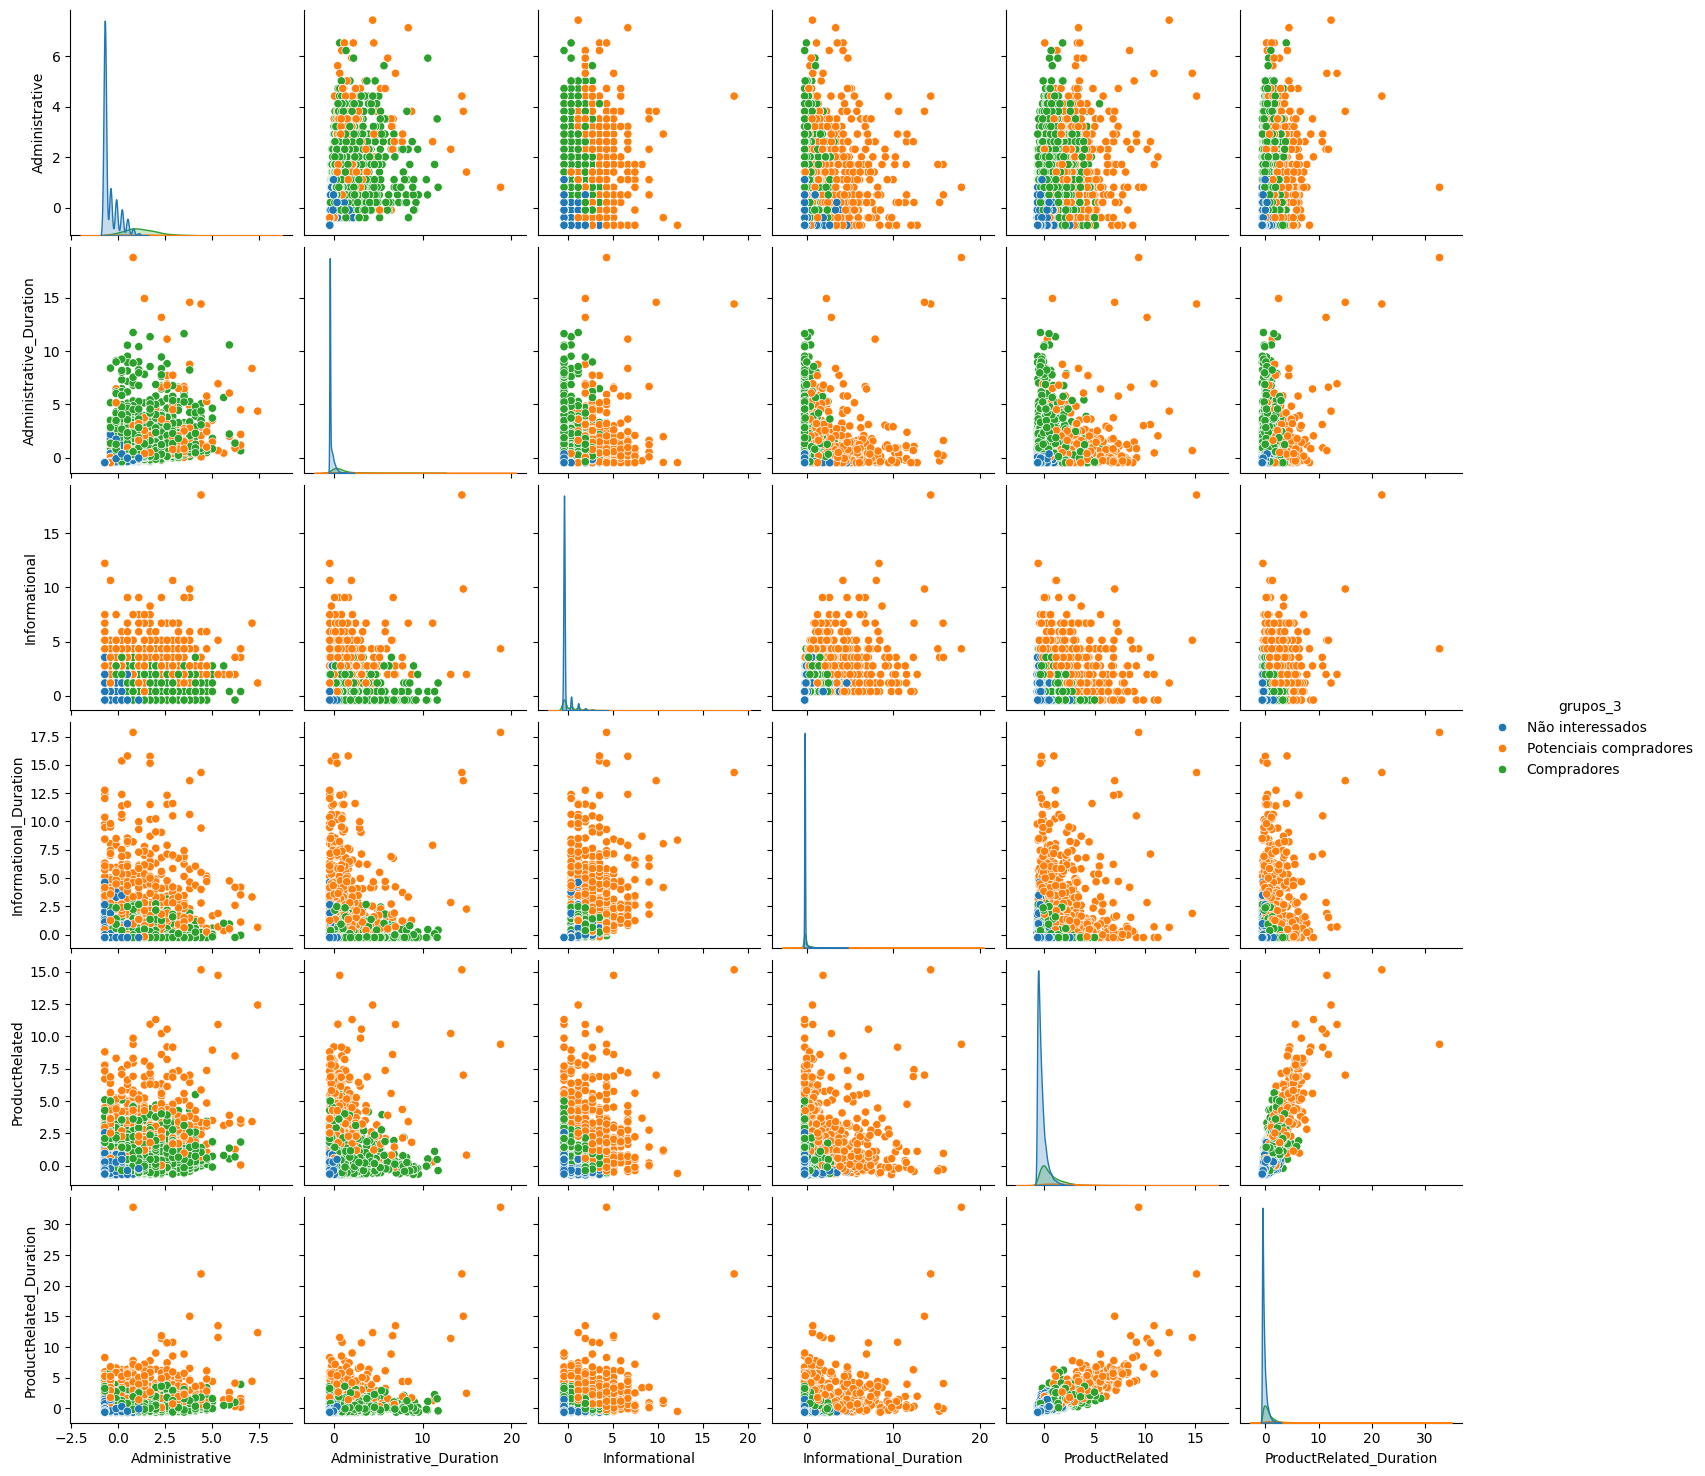

In [42]:
# Aplicado o Pairplot para visualizar das variáveis após a clusterização.
# A coluna 'grupos_3' é usada para colorir os pontos com base nos três diferentes grupos.
sns.pairplot(data=df_pad_[list(colunas) + ['grupos_3']], hue='grupos_3')

# Exibe o gráfico.
plt.show()